In [32]:
import tensorflow as tf

In [33]:
from tensorflow import keras

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #
from tensorflow.keras.models import Sequential #
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D 
#Dense=computational unit make less
#Dropout = Numerical unit drop

In [43]:
#cd /path
#!unzip /path or archive.zip
num_classes = 2 #cat and dog
img_row = 64
img_col = 64 #image size
train_dataset = "E:\\AIBroadway\\catvsdog\\training_set\\training_set"
test_dataset = "E:\\AIBroadway\\catvsdog\\test_set\\test_set"

In [44]:
#data augmentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
rotation_range = 30,
width_shift_range = 0.4,
height_shift_range = 0.4,
horizontal_flip = True,
fill_mode='nearest')

In [45]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_generator = train_datagen.flow_from_directory(
    train_dataset,
    target_size=(img_row,img_col),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 8005 images belonging to 2 classes.


In [47]:
validation_generator = train_datagen.flow_from_directory(
    test_dataset,
    target_size=(img_row,img_col),
    batch_size = 32,
    class_mode = 'binary',
    shuffle = True
)

Found 2023 images belonging to 2 classes.


In [48]:
model = Sequential() #feature map
#input layer for convolution
model.add(Conv2D(64,(3,3),padding='same',input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#hidden layer conv
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(16,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#flatten conv
model.add(Flatten())#single layer 1D
model.add(Dense(256)) #only few send
model.add(Activation('relu'))
model.add(Dropout(0.5)) #size decrease
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)       

In [49]:
#neural network
model.add(Dense(units=256, activation = 'relu'))
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=32, activation = 'relu'))
model.add(Dense(units=16, activation = 'relu')) # only +
model.add(Dense(1))
model.add(Activation('sigmoid')) #0 or 1 output layer ma yes or no softmax do for probality
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        18464     
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)       

In [50]:
#comile before traing
#training
model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 8005//32,
    epochs = 10,
    validation_data= validation_generator,
    validation_steps = 2023//32
)

Epoch 1/10
250/250 [==============================] - 198s 791ms/step - loss: 0.6939 - accuracy: 0.5016 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/10
250/250 [==============================] - 57s 226ms/step - loss: 0.6866 - accuracy: 0.5505 - val_loss: 0.6789 - val_accuracy: 0.5843
Epoch 3/10
250/250 [==============================] - 58s 232ms/step - loss: 0.6732 - accuracy: 0.5790 - val_loss: 0.6605 - val_accuracy: 0.5967
Epoch 4/10
250/250 [==============================] - 58s 230ms/step - loss: 0.6700 - accuracy: 0.5899 - val_loss: 0.6589 - val_accuracy: 0.5719
Epoch 5/10
250/250 [==============================] - 58s 231ms/step - loss: 0.6636 - accuracy: 0.5950 - val_loss: 0.7025 - val_accuracy: 0.5704
Epoch 6/10
250/250 [==============================] - 57s 229ms/step - loss: 0.6563 - accuracy: 0.6183 - val_loss: 0.6456 - val_accuracy: 0.6448
Epoch 7/10
250/250 [==============================] - 57s 230ms/step - loss: 0.6511 - accuracy: 0.6188 - val_loss: 0.6296 - val_a

In [51]:
model.save('E:\\AIBroadway\\cat_vs_dog.h5')

In [52]:
#test
from tensorflow.python.keras.utils.generic_utils import class_and_config_for_serialized_keras_object
import numpy as np #to convert array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

classifier = load_model('E:\\AIBroadway\\cat_vs_dog.h5')
test_image = image.load_img('E:\\AIBroadway\\catvsdog\\test_set\\test_set\\cats\\cat.4002.jpg',target_size = (64,64,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = classifier.predict(test_image)
print(result)
if result > 0.6:
  print("This is dog")
else:
  print("This is cat")

[[1.]]
This is dog


In [53]:
history.history

{'loss': [0.6939066052436829,
  0.6866346001625061,
  0.6731613874435425,
  0.6700038313865662,
  0.6635844111442566,
  0.6563143134117126,
  0.6511174440383911,
  0.6446840167045593,
  0.6387437582015991,
  0.6353889107704163],
 'accuracy': [0.5015677809715271,
  0.5504828691482544,
  0.5789539813995361,
  0.5898658037185669,
  0.595008134841919,
  0.6183369159698486,
  0.6188386082649231,
  0.6284961700439453,
  0.634265661239624,
  0.6409130692481995],
 'val_loss': [0.6933727860450745,
  0.6788807511329651,
  0.6605191230773926,
  0.6588732600212097,
  0.7025142908096313,
  0.6456307172775269,
  0.6295704245567322,
  0.6239504218101501,
  0.6200299859046936,
  0.6206393241882324],
 'val_accuracy': [0.5,
  0.58432537317276,
  0.5967261791229248,
  0.57192462682724,
  0.5704365372657776,
  0.6448412537574768,
  0.6542658805847168,
  0.6517857313156128,
  0.6498016119003296,
  0.6622023582458496]}

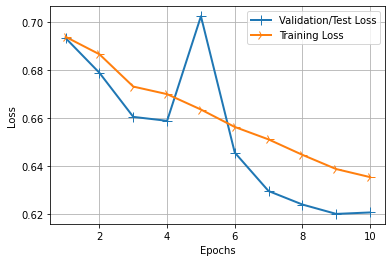

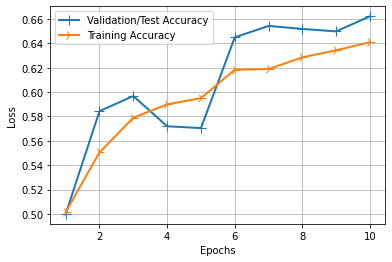

In [54]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history #

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

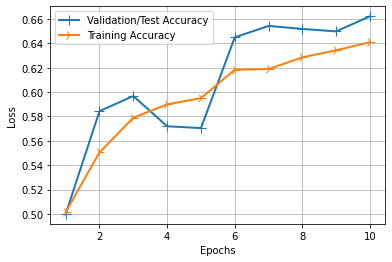

In [55]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()